# LeetCode Add Nums

LeetCode AddNums:



This was a very interesting problem because right off the bat you think adding integers is easy, well not so much.



They tell you essentially off the bat with typing that you are using a singly linked-list.  So I created a dummy list to store the answer, and then a carry over which starts at zero.  Just like old school math, you use the carry over to represent the digit to carry and add to the next numbers.



So you first check if there is a value, and if there is return it, otherwise return zero.  I used a what resembles a list comprehension but is a ternary operator.  Then you add the numbers, plus the carry, which will be zero on the first.  Due to integer division we need to calculate the remainder and carry separately.  We add the numbers, we calculate the carry by dividing by 10, and we calc the remainder by modulo 10.



We are going through both lists at the same time, and, which is the current node, and then we move to current.next.  Current is a ListNode, which is the node class that defines a node, which is a value and a pointer.  current.next = ListNode(val) we create a new ListNode with the sum value, then you set next pointer which is pointer at current, to the new node.  So dummy list looks like [], [7] right now, the next pointer is used to link the value.  Linked-Lists allow you to be able to point to different values without moving the memory.  Now current will append to the list.



Using Python lists, this whole problem is counter-intuitive, as python lists are Dynamic Arrays.  In a normal linked list, you need to traverse through the list to get the next value, as they are stored separately in memory, not contiguously like in arrays.  Finally we move to current.next, and we update the l1, and l2 pointers to point to the new node.  Which is l1.next, unless there is no value then return none.  Then we loop through checking if there is another digit, we add it, create the new node, have the pointer change to point to it, update the pointers and move on down l1, and l2.

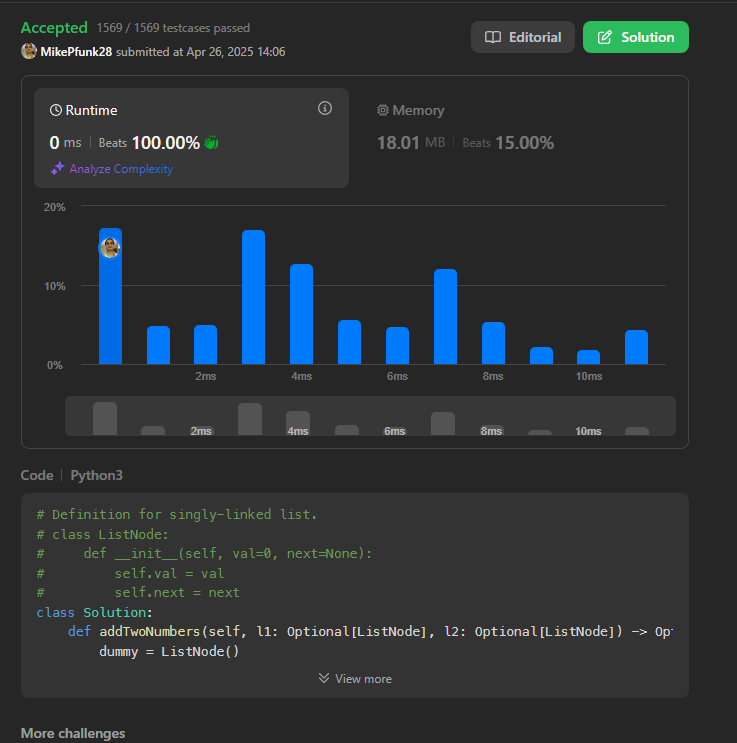


In [ ]:
from typing import Optional
# Definition for singly-linked list.
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next
        
class Solution:
    def addTwoNumbers(self, l1: Optional[ListNode], l2: Optional[ListNode]) -> Optional[ListNode]:
        dummy = ListNode()
        current: Optional[ListNode] = dummy
        carry = 0

        while l1 or l2 or carry:
            # Get the values one at a time and add them.
            # List Comprehension
            val1 = l1.val if l1 else 0
            val2 = l2.val if l2 else 0

            # New value
            # This is almost counter-intuitive, as we are adding the numbers digit by digit.
            # The carry is going to have the remainder cut off from rounding using int types.
            # So we use modulo to get the remainder to know what the digit is to add.
            # calculate the value or the sum to store in the new LinkedList
            val = val1 + val2 + carry
            # calculate the carry separately.
            carry = val // 10
            # Get modulo or remainder
            val = val % 10
            # If val1 + val2 + carry >= 10:
            #    return carry = 1

            current.next = ListNode(val)

    
            # Update pointers
            current = current.next
            l1 = (l1.next if l1 else None)
            l2 = l2.next if l2 else None

        return dummy.next